In [1]:
import numpy as np
from keras import layers, models
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [3]:
train_data.shape

(60000, 28, 28)

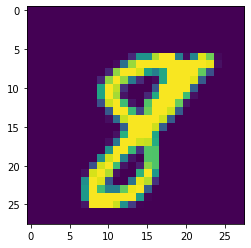

In [4]:
plt.imshow(train_data[55])

In [5]:
train_labels[55]

8

In [6]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10, activation='softmax'))

In [7]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics='accuracy')

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [9]:
x_train = train_data.reshape((60000, 28*28))
x_train = x_train.astype('float32')/255

x_test = test_data.reshape((10000, 28*28))
x_test = x_test.astype('float32')/255

In [10]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [11]:
train_labels[0]

5

In [12]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [13]:
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 30s 14ms/step - loss: 0.4211 - accuracy: 0.8773
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1097 - accuracy: 0.9682
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0695 - accuracy: 0.9787
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0474 - accuracy: 0.9855
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0351 - accuracy: 0.9896


In [14]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0753 - accuracy: 0.9789


[0.07528115808963776, 0.9789000153541565]